# Spark Foundation 
# Prediction using Decision Tree
## Name :- Tejas V. Sutar
## Task:-The purpose is if we feed any new data to this classifier, it would be able to pedict the right class accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\tejas\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df=pd.read_csv("D:\TEJAS FORMAT\GRIP INTERNSHIP\DECISION TREE\iris.csv")

In [3]:
df.shape

(150, 6)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##  Here,we have the output in Discrete with more than two classes so we can use Label Encoding or One Hot Encoding.

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
df=df.drop(["Id"],axis=1)

In [7]:
select_columns=["Species"]

In [8]:
le=LabelEncoder()
le.fit(df[select_columns].values.flatten())
df[select_columns]=df[select_columns].apply(le.fit_transform)

# Decision Tree Model Building

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
clf=DecisionTreeClassifier(criterion="entropy")

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.iloc[:,0:4]
y=df.iloc[:,4]

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [14]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
y_pred=clf.predict(X_test)

In [16]:
clf.score(X_test,Y_test)

0.9111111111111111

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,Y_test)

0.9111111111111111

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  3, 18]], dtype=int64)

In [19]:
from sklearn import tree

## Gini index 

In [20]:
clf1=DecisionTreeClassifier(criterion="gini")
clf1.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
y_pred1=clf1.predict(X_test)

In [22]:
clf1.score(X_test,Y_test)

0.9111111111111111

In [23]:
accuracy_score(y_pred,Y_test)

0.9111111111111111

In [24]:
X_test["Actual"]=Y_test

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
X_test['Actual']=X_test.Actual.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
X_test["Predicted"]=y_pred

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
X_test["Predicted"]=X_test.Predicted.map({0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'})

C:\Users\tejas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Decision Tree')

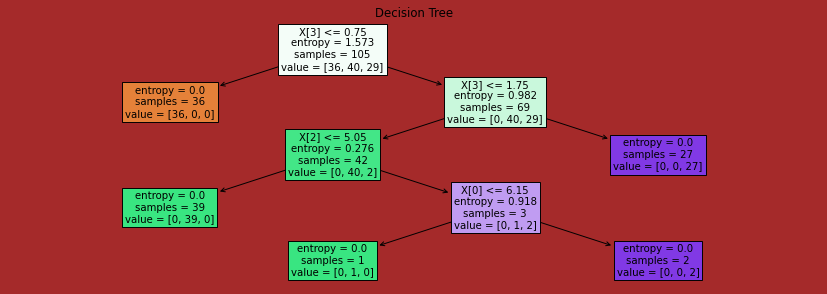

In [28]:
plt.figure(num=None,figsize=(15,5),dpi=70,facecolor='brown',edgecolor='yellow')
tree.plot_tree(clf,filled=True)
plt.title('Decision Tree')

In [29]:
X_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual,Predicted
125,7.2,3.2,6.0,1.8,Iris-virginica,Iris-virginica
124,6.7,3.3,5.7,2.1,Iris-virginica,Iris-virginica
18,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor,Iris-versicolor
144,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor
38,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa
70,5.9,3.2,4.8,1.8,Iris-versicolor,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
36,5.5,3.5,1.3,0.2,Iris-setosa,Iris-setosa


# Thank You